<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br><br>

# Listed Volatility and Variance Derivatives

**Dr. Yves J. Hilpisch &mdash; Wiley Finance (2016)**

<img src="http://hilpisch.com/images/lvvd_cover.png" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

# VSTOXX Index

## Introduction

## Collecting Option Data

In [1]:
import sys
sys.path.append('scripts')

In [2]:
path = 'data/'

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import index_collect_option_data as icod

In [4]:
today = dt.datetime.now()
## make sure to hit a business day
target_day = today - dt.timedelta(days=1)
ds = target_day.strftime('%Y%m%d')
ds

'20161020'

In [5]:
## adjust maturity parameters if necessary
call_data = icod.get_data_from_www(oType='Call', matMonth=3,
                                   matYear=2017, date=ds)
put_data = icod.get_data_from_www(oType='Put', matMonth=3,
                                  matYear=2017, date=ds)

In [6]:
## parse the raw data
calls = icod.parse_data(call_data, target_day)
puts = icod.parse_data(put_data, target_day)

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75 entries, (2016-10-20 00:00:00, 500.0) to (2016-10-20 00:00:00, 6000.0)
Data columns (total 8 columns):
Version number          75 non-null float64
Opening price           75 non-null float64
Daily high              75 non-null float64
Daily low               75 non-null float64
Last price              75 non-null float64
Daily settlem. price    75 non-null float64
Traded contracts        75 non-null int64
Open interest           75 non-null int64
dtypes: float64(6), int64(2)
memory usage: 5.3+ KB


In [8]:
puts.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75 entries, (2016-10-20 00:00:00, 500.0) to (2016-10-20 00:00:00, 6000.0)
Data columns (total 8 columns):
Version number          75 non-null float64
Opening price           75 non-null float64
Daily high              75 non-null float64
Daily low               75 non-null float64
Last price              75 non-null float64
Daily settlem. price    75 non-null float64
Traded contracts        75 non-null int64
Open interest           75 non-null int64
dtypes: float64(6), int64(2)
memory usage: 5.3+ KB


In [9]:
calls = pd.DataFrame(calls.rename(
        columns={'Daily settlem. price': 'Call_Price'}
                            ).pop('Call_Price').astype(float))

In [10]:
puts = pd.DataFrame(puts.rename(
        columns={'Daily settlem. price': 'Put_Price'}
                            ).pop('Put_Price').astype(float))

In [11]:
dataset = icod.merge_and_filter(puts, calls)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 63 entries, (2016-10-20 00:00:00, 1400.0) to (2016-10-20 00:00:00, 3900.0)
Data columns (total 2 columns):
Call_Price    63 non-null float64
Put_Price     63 non-null float64
dtypes: float64(2)
memory usage: 1.5+ KB


In [12]:
os = icod.collect_option_series(3, 2017, target_day)
os.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 63 entries, (2016-10-20 00:00:00, 1400.0) to (2016-10-20 00:00:00, 3900.0)
Data columns (total 2 columns):
Call_Price    63 non-null float64
Put_Price     63 non-null float64
dtypes: float64(2)
memory usage: 1.5+ KB


In [13]:
# uncomment to initiate the process (takes a few minutes)
# %time icod.data_collection(path)

In [14]:
store = pd.HDFStore(path + 'index_option_series.h5', 'r')
store

<class 'pandas.io.pytables.HDFStore'>
File path: data/index_option_series.h5
/Dec16            frame        (shape->[1098,2])
/Nov16            frame        (shape->[849,2]) 
/Oct16            frame        (shape->[426,2]) 

In [15]:
Dec16 = store['Dec16']

In [16]:
Dec16.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1098 entries, (2016-09-23 00:00:00, 1800.0) to (2016-10-20 00:00:00, 3500.0)
Data columns (total 2 columns):
Call_Price    1098 non-null float64
Put_Price     1098 non-null float64
dtypes: float64(2)
memory usage: 25.7+ KB


In [17]:
store.close()

In [18]:
Dec16.ix[25:35]

Call_Price  Put_Price
 Pricing day Strike price                       
2016-09-23   2700.0             348.6       29.3
             2725.0             326.8       32.6
             2750.0             305.5       36.2
             2775.0             284.5       40.3
             2800.0             264.0       44.8
             2825.0             243.9       49.7
             2850.0             224.3       55.2
             2875.0             205.3       61.2
             2900.0             186.9       67.8
             2925.0             169.2       75.1

## Calculating the Sub-Indexes

### The Algorithm

In [19]:
import warnings; warnings.simplefilter('ignore')

In [20]:
import index_subindex_calculation as isc
si = isc.make_subindex(path)
si

,Expiry V6I1,Expiry V6I2,Expiry V6I3,V6I1,V6I2,V6I3
2015-11-27,2015-12-18,2016-01-15,NaN,23.759804,22.360188,NaN
2015-11-30,2015-12-18,2016-01-15,NaN,25.299727,22.740036,NaN
2015-12-01,2015-12-18,2016-01-15,NaN,25.613843,22.675634,NaN
2015-12-02,2015-12-18,2016-01-15,NaN,24.904232,22.070847,NaN
2015-12-03,2015-12-18,2016-01-15,NaN,24.487130,22.050495,NaN
2015-12-04,2015-12-18,2016-01-15,NaN,24.139754,22.280183,NaN
2015-12-07,2015-12-18,2016-01-15,NaN,23.743333,21.809108,NaN
2015-12-08,2015-12-18,2016-01-15,NaN,26.508476,23.306916,NaN
2015-12-09,2015-12-18,2016-01-15,NaN,28.073811,24.015911,NaN
2015-12-10,2015-12-18,2016-01-15,NaN,28.199642,24.363648,NaN


In [21]:
si.index

DatetimeIndex(['2015-11-27', '2015-11-30', '2015-12-01', '2015-12-02',
               '2015-12-03', '2015-12-04', '2015-12-07', '2015-12-08',
               '2015-12-09', '2015-12-10', '2015-12-11', '2015-12-14',
               '2015-12-15', '2015-12-16', '2015-12-17', '2015-12-18',
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24'],
              dtype='datetime64[ns]', freq=None)

In [22]:
vs_url = 'https://www.stoxx.com/document/'
vs_url += 'Indices/Current/HistoricalData/h_vstoxx.txt'
vs = pd.read_csv(vs_url,  # filename
                 index_col=0,  # index column (dates)
                 parse_dates=True,  # parse date information
                 dayfirst=True, # day before month
                 header=2)  # header/column names
vs.to_csv(path + 'vs.csv')  # write as CSV file
# vs = vs[vs.index <= '2015-12-31']
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [23]:
comp = pd.concat((si['V6I2'], vs['V6I2']),
          axis=1, join='inner')
comp.index = comp.index.normalize()
comp.columns = ['CALC', 'REAL']
comp['DIFF'] = comp['CALC'] - comp['REAL']
comp

,CALC,REAL,DIFF
2015-11-27,22.360188,22.3778,-0.017612
2015-11-30,22.740036,22.7497,-0.009664
2015-12-01,22.675634,22.7239,-0.048266
2015-12-02,22.070847,22.0465,0.024347
2015-12-03,22.050495,22.0724,-0.021905
2015-12-04,22.280183,22.3454,-0.065217
2015-12-07,21.809108,21.8242,-0.015092
2015-12-08,23.306916,23.2577,0.049216
2015-12-09,24.015911,23.9786,0.037311
2015-12-10,24.363648,24.3061,0.057548


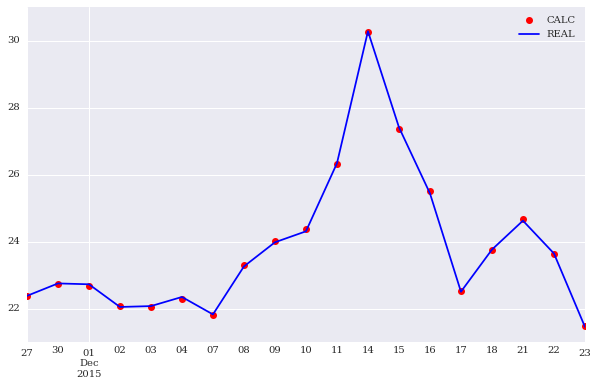

In [24]:
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'  # set serif font
%matplotlib inline
comp[['CALC', 'REAL']].plot(style=['ro', 'b'], figsize=(10, 6));

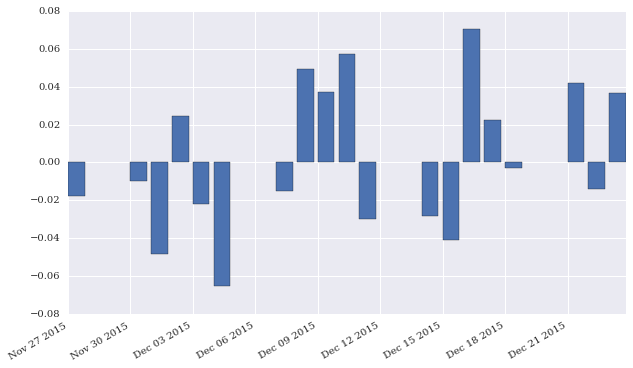

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6));
plt.bar(comp.index, comp['DIFF']);
plt.gcf().autofmt_xdate();

## Calculating the VSTOXX Index

In [26]:
import index_vstoxx_calculation as ivc
%time data = ivc.calculate_vstoxx(path)

CPU times: user 839 ms, sys: 10.7 ms, total: 850 ms
Wall time: 854 ms


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 20 columns):
V2TX                 4357 non-null float64
V6I1                 3906 non-null float64
V6I2                 4357 non-null float64
V6I3                 4296 non-null float64
V6I4                 4357 non-null float64
V6I5                 4357 non-null float64
V6I6                 4340 non-null float64
V6I7                 4357 non-null float64
V6I8                 4343 non-null float64
Settlement date 1    4357 non-null datetime64[ns]
Settlement date 2    4357 non-null datetime64[ns]
Life time 1          4357 non-null int64
Life time 2          4357 non-null int64
Use V6I2             4357 non-null bool
Subindex to use 1    4357 non-null float64
Subindex to use 2    4357 non-null float64
Part 1               4357 non-null float64
Part 2               4357 non-null float64
VSTOXX               4357 non-null float64
Difference           4357 non-null float64
dtypes: 

In [28]:
## output: average error of re-calculation
data['Difference'].mean()

0.0012799470095575995

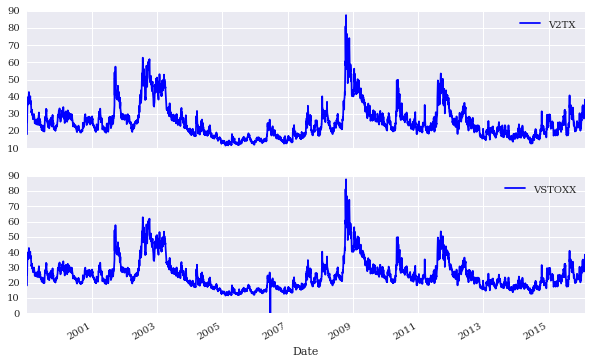

In [29]:
## original vs. re-calculated VSTOXX index
data[['V2TX', 'VSTOXX']].plot(subplots=True, figsize=(10, 6),
                              style="blue", grid=True);

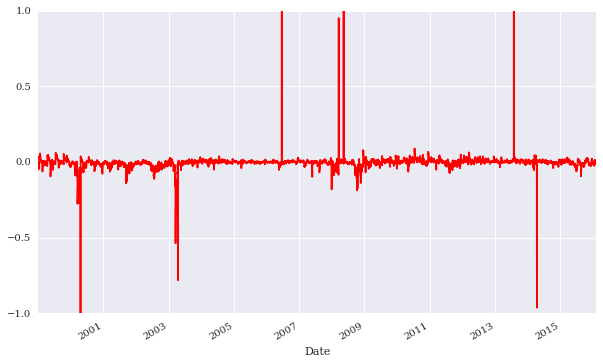

In [30]:
## differences between single values
data['Difference'].plot(figsize=(10, 6), style="r", grid=True,
                        ylim=(-1, 1));

## Conclusions

## Python Scripts

### index_collect_option_data.py

### index_subindex_calculation.py

### index_vstoxx_calculation.py

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**DX Analytics** |
<a href="http://dx-analytics.com">http://dx-analytics.com</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance Books** |
<a href="http://books.tpq.io" target="_blank">http://books.tpq.io</a>

**Python for Finance Training** |
<a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>